In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob
from datetime import datetime
import scipy as sp
import scipy.optimize as op
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
%matplotlib inline

In [56]:
!mkdir plots

In [2]:
# define ticks
def set_ticks(ax, xMaj, xMin, yMaj, yMin):
    ax.xaxis.set_major_locator(MultipleLocator(xMaj))
    ax.xaxis.set_minor_locator(AutoMinorLocator(xMin))
    ax.yaxis.set_major_locator(MultipleLocator(yMaj))
    ax.yaxis.set_minor_locator(AutoMinorLocator(yMin))
    ax.tick_params(which='major', right=True, width=1.0, length=8, direction="in", labelsize=12)
    ax.tick_params(which='minor', right=True, width=1.0, length=4, direction="in", labelsize=12)

def set_ticks_x(ax, xMaj, xMin):
    ax.xaxis.set_major_locator(MultipleLocator(xMaj))
    ax.xaxis.set_minor_locator(AutoMinorLocator(xMin))
    ax.tick_params(which='major', right=True, width=1.0, length=8, direction="in", labelsize=12)
    ax.tick_params(which='minor', right=True, width=1.0, length=4, direction="in", labelsize=12)

In [46]:
def efficiency(x, a, b, v0):
    return a / (1 + np.exp(-b * (x - v0)))

def rate_function(x, a, b, r0):
    return np.exp(a + b * x) + r0

In [47]:
def plot_efficiency(ax, filename, title, save=True):

    # unpack data
    x, _, _, _, eff, _, _, _, s_eff, rate, s_rate = np.loadtxt(filename, unpack=True)

    # fit
    pms_eff, _ = op.curve_fit(efficiency, x, eff, sigma=s_eff,
                              bounds=((0.7, 0.01, 1500), (1.3, 0.12, 2000)))
    pms_rate, _ = op.curve_fit(rate_function, x, rate, sigma=s_rate,
                               bounds=((-30, 0.01, -20), (-10, 0.03, 10)))

    # efficiency
    domain = np.linspace(min(x), max(x), 50)
    ax.plot(domain, efficiency(domain, *pms_eff), color='forestgreen', ls='-', alpha=0.3, lw=3)
    ax.errorbar(x, eff, yerr=s_eff, marker='o', mec='white', markersize=9, 
                color='forestgreen', linestyle='none', label='Efficiency', capsize=4)

    # # pay attention to the case eff > 1
    # for r, e, se in zip(x, eff, s_eff):
    #     if e + se > 1:
    #         ax.errorbar(r, e, yerr=se, marker='o', mec='white', markersize=9, 
    #                     color='forestgreen', linestyle='none', uplims=True)
    #     else:
    #         ax.errorbar(r, e, yerr=se, marker='o', mec='white', markersize=9, 
    #                     color='forestgreen', linestyle='none')

    # rate
    ax2 = ax.twinx()
    ax2.plot(domain, rate_function(domain, *pms_rate), color='firebrick', ls='-', alpha=0.3, lw=3)
    ax2.errorbar(x, rate, yerr=s_rate, marker='o', mec='white', markersize=9, 
                color='firebrick', linestyle='none', label='Rate', capsize=4)

    # labels
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel("Efficiency", fontsize=14)
    ax.set_xlabel("HV [V]", fontsize=14)
    ax2.set_ylabel("Rate [Hz]", fontsize=14)

    # highlight axis
    ax2.spines['right'].set_color('firebrick')
    ax2.yaxis.label.set_color('firebrick') 
    ax2.tick_params(axis='y', colors='firebrick')

    # legend
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0, fontsize=13, frameon=False)

    # save
    if save:
        name, _ = os.path.splitext(filename)
        fig.savefig("plots/" + name + ".pdf")

In [48]:
def plot_efficiency_both(ax, filename_near, filename_far, title, save=True):

    # unpack data
    x_near, _, _, _, eff_near, _, _, _, s_eff_near, rate_near, s_rate_near = np.loadtxt(filename_near, unpack=True)
    x_far, _, _, _, eff_far, _, _, _, s_eff_far, rate_far, s_rate_far = np.loadtxt(filename_far, unpack=True) 

    # fit near
    pms_eff_near, _ = op.curve_fit(efficiency, x_near, eff_near, sigma=s_eff_near,
                              bounds=((0.7, 0.01, 1500), (1.3, 0.12, 2000)))
    pms_rate_near, _ = op.curve_fit(rate_function, x_near, rate_near, sigma=s_rate_near,
                               bounds=((-30, 0.01, -20), (-10, 0.03, 10)))

    # fit near
    pms_eff_far, _ = op.curve_fit(efficiency, x_far, eff_far, sigma=s_eff_far,
                              bounds=((0.7, 0.01, 1500), (1.3, 0.12, 2000)))
    pms_rate_far, _ = op.curve_fit(rate_function, x_far, rate_far, sigma=s_rate_far,
                               bounds=((-30, 0.01, -20), (-10, 0.03, 10)))

    # efficiency near
    domain = np.linspace(min(x_near), max(x_near), 50)
    ax.plot(domain, efficiency(domain, *pms_eff_near), color='forestgreen', ls='-', alpha=0.3, lw=3)
    ax.errorbar(x_near, eff_near, yerr=s_eff_near, marker='o', mec='white', markersize=9, 
                color='forestgreen', linestyle='none', capsize=4, label='Efficiency (near)')

    # rate near
    ax2 = ax.twinx()
    ax2.plot(domain, rate_function(domain, *pms_rate_near), color='firebrick', ls='-', alpha=0.3, lw=3)
    ax2.errorbar(x_near, rate_near, yerr=s_rate_near, marker='o', mec='white', markersize=9, 
                color='firebrick', linestyle='none', label='Rate (near)', capsize=4)

    # efficiency far
    domain = np.linspace(min(x_far), max(x_far), 50)
    ax.plot(domain, efficiency(domain, *pms_eff_far), color='royalblue', ls='--', alpha=0.3, lw=3)
    ax.errorbar(x_far, eff_far, yerr=s_eff_far, marker='D', mec='white', markersize=9, 
                color='royalblue', linestyle='none', capsize=4, label='Efficiency (far)')

    # rate far
    ax2.plot(domain, rate_function(domain, *pms_rate_far), color='darkred', ls='--', alpha=0.3, lw=3)
    ax2.errorbar(x_far, rate_far, yerr=s_rate_far, marker='D', mec='white', markersize=9, 
                color='darkred', linestyle='none', label='Rate (far)', capsize=4)

    # labels
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel("Efficiency", fontsize=14)
    ax.set_xlabel("HV [V]", fontsize=14)
    ax2.set_ylabel("Rate [Hz]", fontsize=14)

    # highlight axis
    ax2.spines['right'].set_color('firebrick')
    ax2.yaxis.label.set_color('firebrick') 
    ax2.tick_params(axis='y', colors='firebrick')

    # legend
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc="lower right", fontsize=13, frameon=False)

    # save
    if save:
        name, _ = os.path.splitext(filename_near)
        fig.savefig("plots/" + name + "_far.pdf")

## Final - 20220428

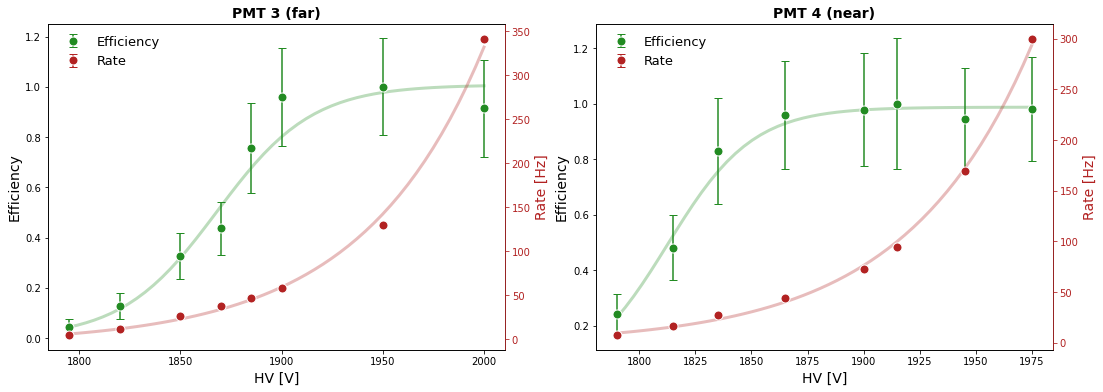

In [68]:
# data
titles = ["PMT 3 (far)", "PMT 4 (near)"]
files = ["data_PMT3_far.dat", "data_PMT4_near.dat"]

# plot
fig, ax = plt.subplots(figsize=(18, 6), ncols=2)
plot_efficiency(ax[0], files[0], titles[0], False)
plot_efficiency(ax[1], files[1], titles[1], False)

# save
fig.savefig("plots/plot_single_3-4.png")

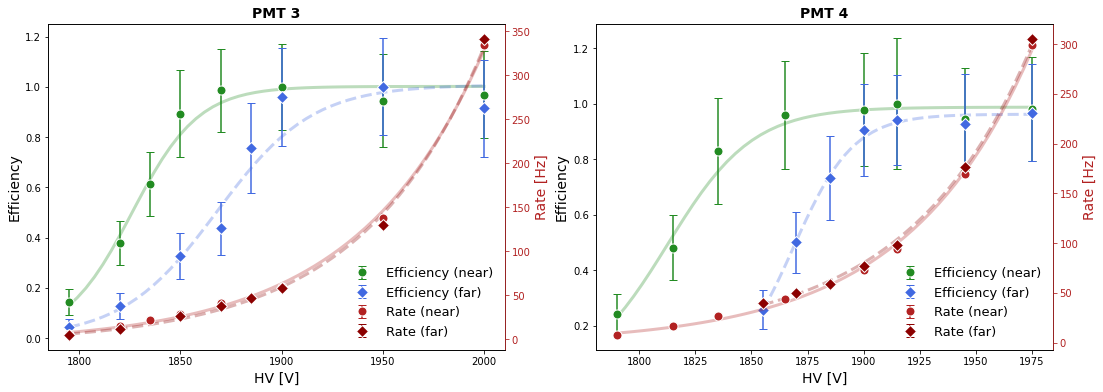

In [69]:
# data
titles = ["PMT 3", "PMT 4"]
files = ["data_PMT3_near.dat", "data_PMT3_far.dat", "data_PMT4_near.dat", "data_PMT4_far.dat"]

# plot
fig, ax = plt.subplots(figsize=(18, 6), ncols=2)
plot_efficiency_both(ax[0], files[0], files[1], titles[0], False)
plot_efficiency_both(ax[1], files[2], files[3], titles[1], False)

# save
fig.savefig("plots/plot_both_3-4.pdf")

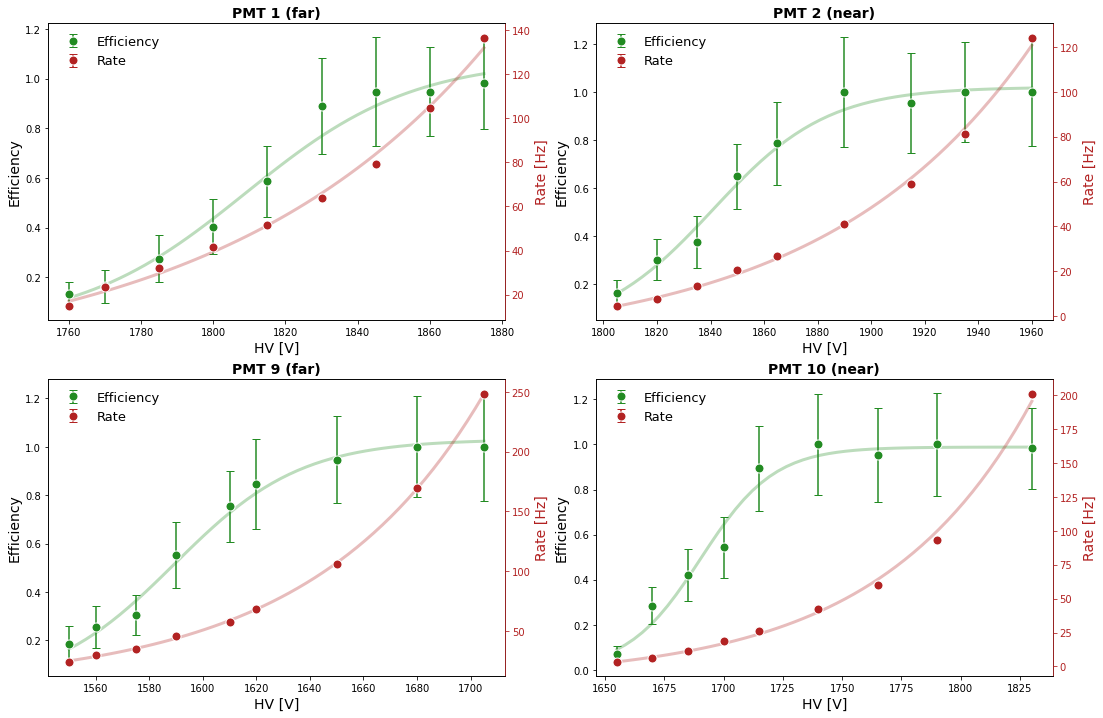

In [70]:
# data
titles = ["PMT 1 (far)", "PMT 2 (near)", "PMT 9 (far)", "PMT 10 (near)"]
files = ["data_PMT1_far.dat", "data_PMT2_near.dat", "data_PMT9_far.dat", "data_PMT10_near.dat"]

# plot
fig, ax = plt.subplots(figsize=(18, 12), ncols=2, nrows=2)

plot_efficiency(ax[0, 0], files[0], titles[0], False)
plot_efficiency(ax[0, 1], files[1], titles[1], False)
plot_efficiency(ax[1, 0], files[2], titles[2], False)
plot_efficiency(ax[1, 1], files[3], titles[3], False)

# save
fig.savefig("plots/plot_single_1-2-9-10.pdf")

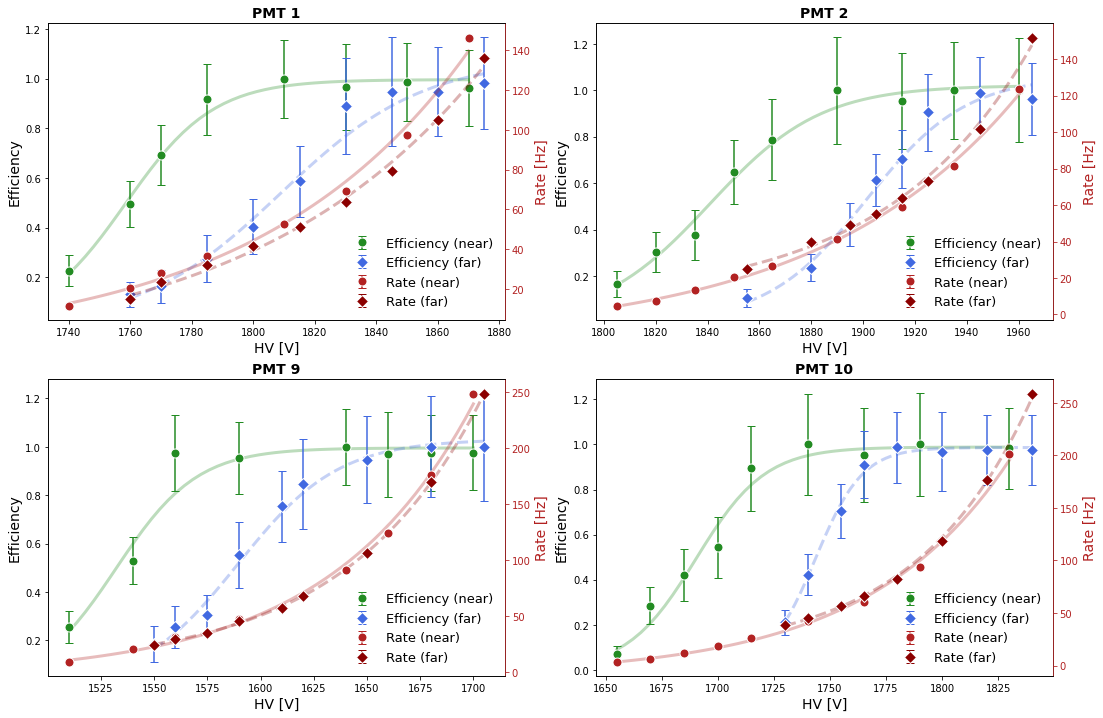

In [71]:
# data
titles = ["PMT 1", "PMT 2", "PMT 9", "PMT 10"]
files = ["data_PMT1_near.dat", "data_PMT1_far.dat", "data_PMT2_near.dat", "data_PMT2_far.dat",
         "data_PMT9_near.dat", "data_PMT9_far.dat", "data_PMT10_near.dat", "data_PMT10_far.dat"]

# plot
fig, ax = plt.subplots(figsize=(18, 12), ncols=2, nrows=2)
plot_efficiency_both(ax[0, 0], files[0], files[1], titles[0], False)
plot_efficiency_both(ax[0, 1], files[2], files[3], titles[1], False)
plot_efficiency_both(ax[1, 0], files[4], files[5], titles[2], False)
plot_efficiency_both(ax[1, 1], files[6], files[7], titles[3], False)

# save
fig.savefig("plots/plot_both_1-2-9-10.pdf")

## PMT 1 (near): tentative changes

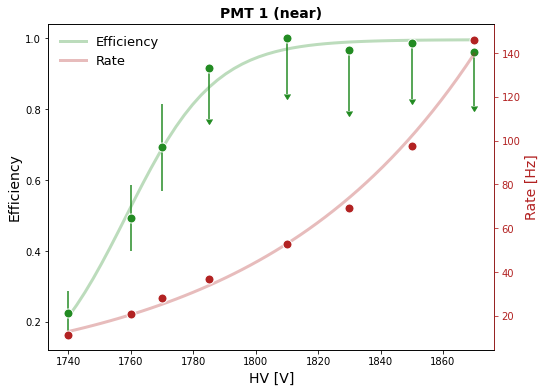

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
plot_efficiency(ax, "data_PMT1_near.dat", "PMT 1 (near)")

## Grouped - 20220420

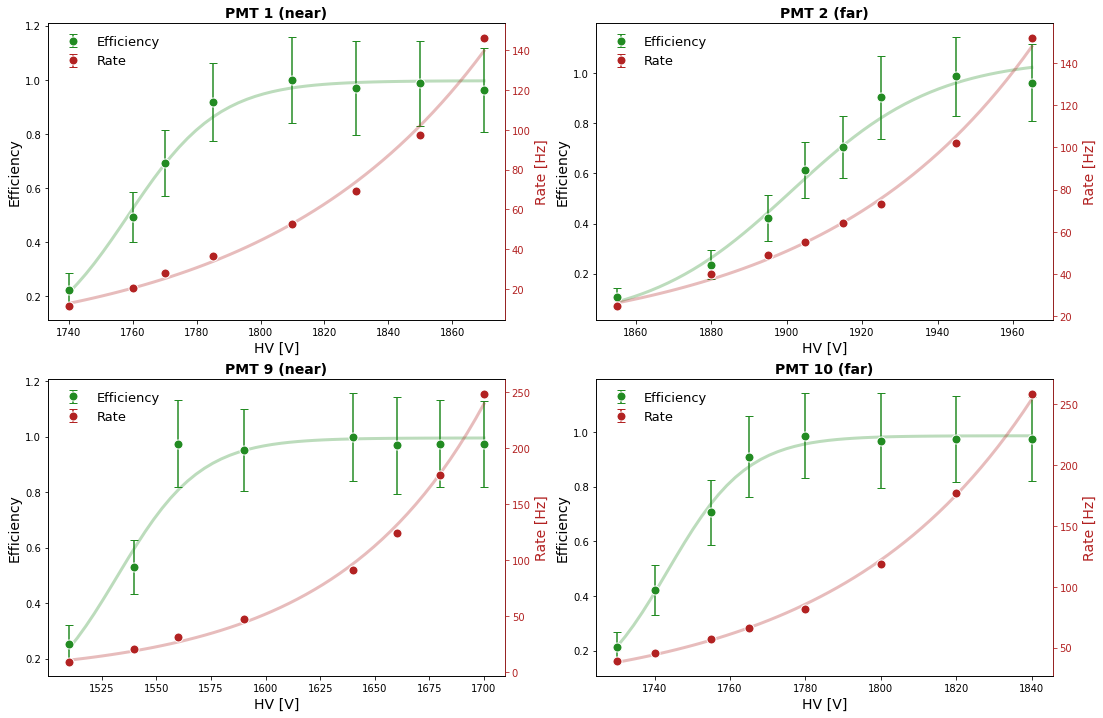

In [72]:
# data
titles = ["PMT 1 (near)", "PMT 2 (far)", "PMT 9 (near)", "PMT 10 (far)"]
files = ["data_PMT1_near.dat", "data_PMT2_far.dat", "data_PMT9_near.dat", "data_PMT10_far.dat"]

# plot
fig, ax = plt.subplots(figsize=(18, 12), ncols=2, nrows=2)

plot_efficiency(ax[0, 0], files[0], titles[0], False)
plot_efficiency(ax[0, 1], files[1], titles[1], False)
plot_efficiency(ax[1, 0], files[2], titles[2], False)
plot_efficiency(ax[1, 1], files[3], titles[3], False)

# save
fig.savefig("plots/plot_20220420.pdf")


## Grouped - 20220421

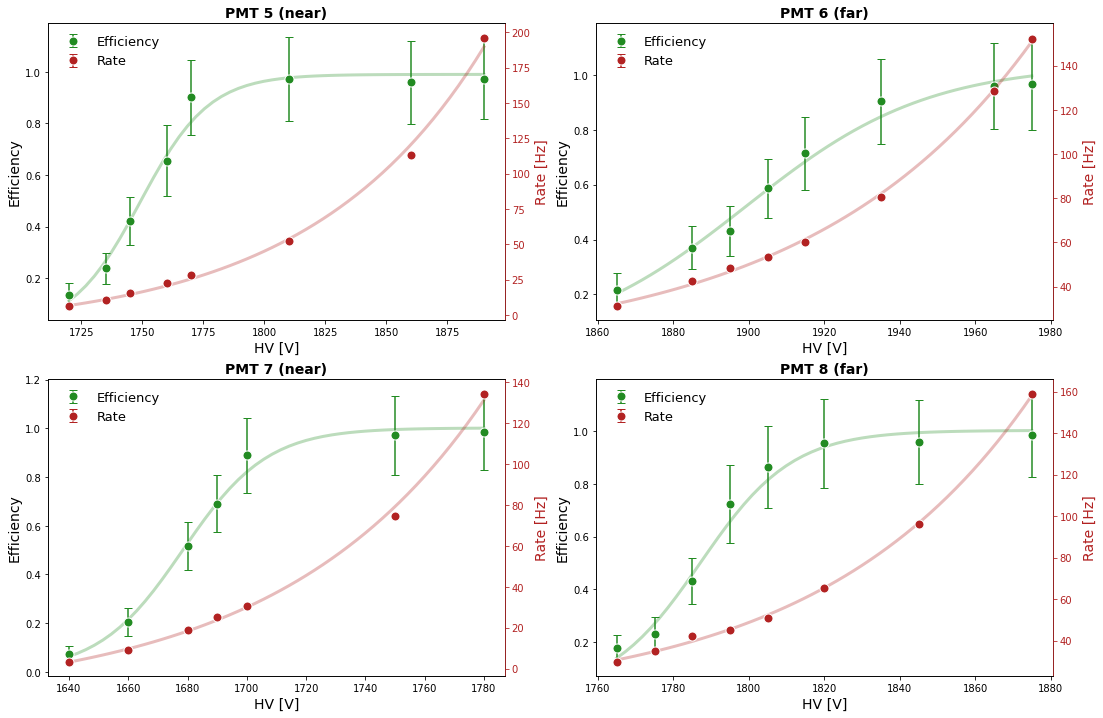

In [73]:
# data
titles = ["PMT 5 (near)", "PMT 6 (far)", "PMT 7 (near)", "PMT 8 (far)"]
files = ["data_PMT5_near.dat", "data_PMT6_far.dat", "data_PMT7_near.dat", "data_PMT8_far.dat"]

# plot
fig, ax = plt.subplots(figsize=(18, 12), ncols=2, nrows=2)
plot_efficiency(ax[0, 0], files[0], titles[0], False)
plot_efficiency(ax[0, 1], files[1], titles[1], False)
plot_efficiency(ax[1, 0], files[2], titles[2], False)
plot_efficiency(ax[1, 1], files[3], titles[3], False)

# save
fig.savefig("plots/plot_20220421.pdf")

# Grouped - 20220426

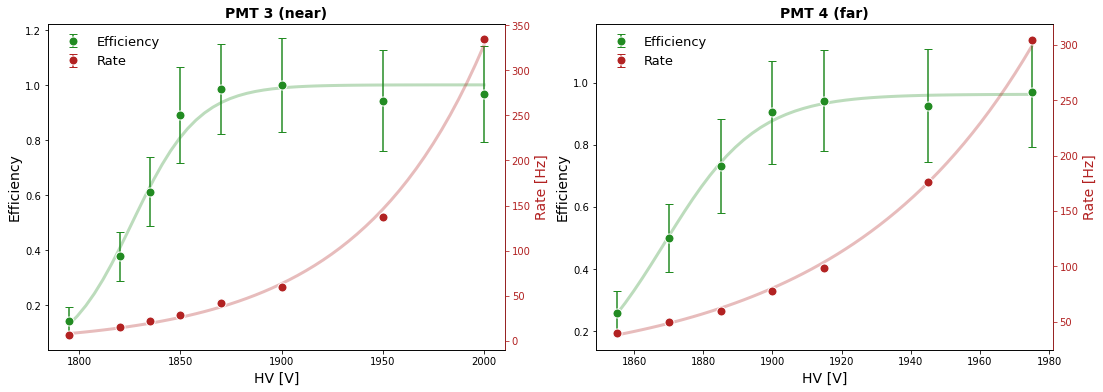

In [74]:
# data
titles = ["PMT 3 (near)", "PMT 4 (far)"]
files = ["data_PMT3_near.dat", "data_PMT4_far.dat"]

# plot
fig, ax = plt.subplots(figsize=(18, 6), ncols=2)
plot_efficiency(ax[0], files[0], titles[0], False)
plot_efficiency(ax[1], files[1], titles[1], False)

# save
fig.savefig("plots/plot_20220426.pdf")